# Research the relative importance of 2pt and 3pt in NBA from 2014 to 2018
_I am a fun of NBA from the era of Michael Jordan. I always have a doubt on the 3pt populatrity as winning factors in the recent years. I therefore compare the 2pt and 3pt shooting percentages and shooting attempts between wining and losing games and between regular and playoff_  

**However, I am surprised with the results I've got to! I try to keep an objective view. Have a look yourself and let me know your thoughts and any suggestions!**  

source of the data: https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018?select=nba.games.stats.csv  
https://www.kaggle.com/mur418/nba-box-scores-19902020-regular-and-playoffs?select=2014-15_Regular_box_scores.csv  

Available dataset: 

                   2014-2018 regular season stats: nba.games.stats.csv 
                   2014-2015 playoff stats: 2014-15_Playoffs_box_scores.csv                     
                   2015-2016 playoff stats: 2015-16_Playoffs_box_scores.csv                     
                   2016-2017 playoff stats: 2016-17_Playoffs_box_scores.csv                     
                   2017-2018 playoff stats: 2017-18_Playoffs_box_scores.csv

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
import seaborn as sns

<IPython.core.display.Javascript object>


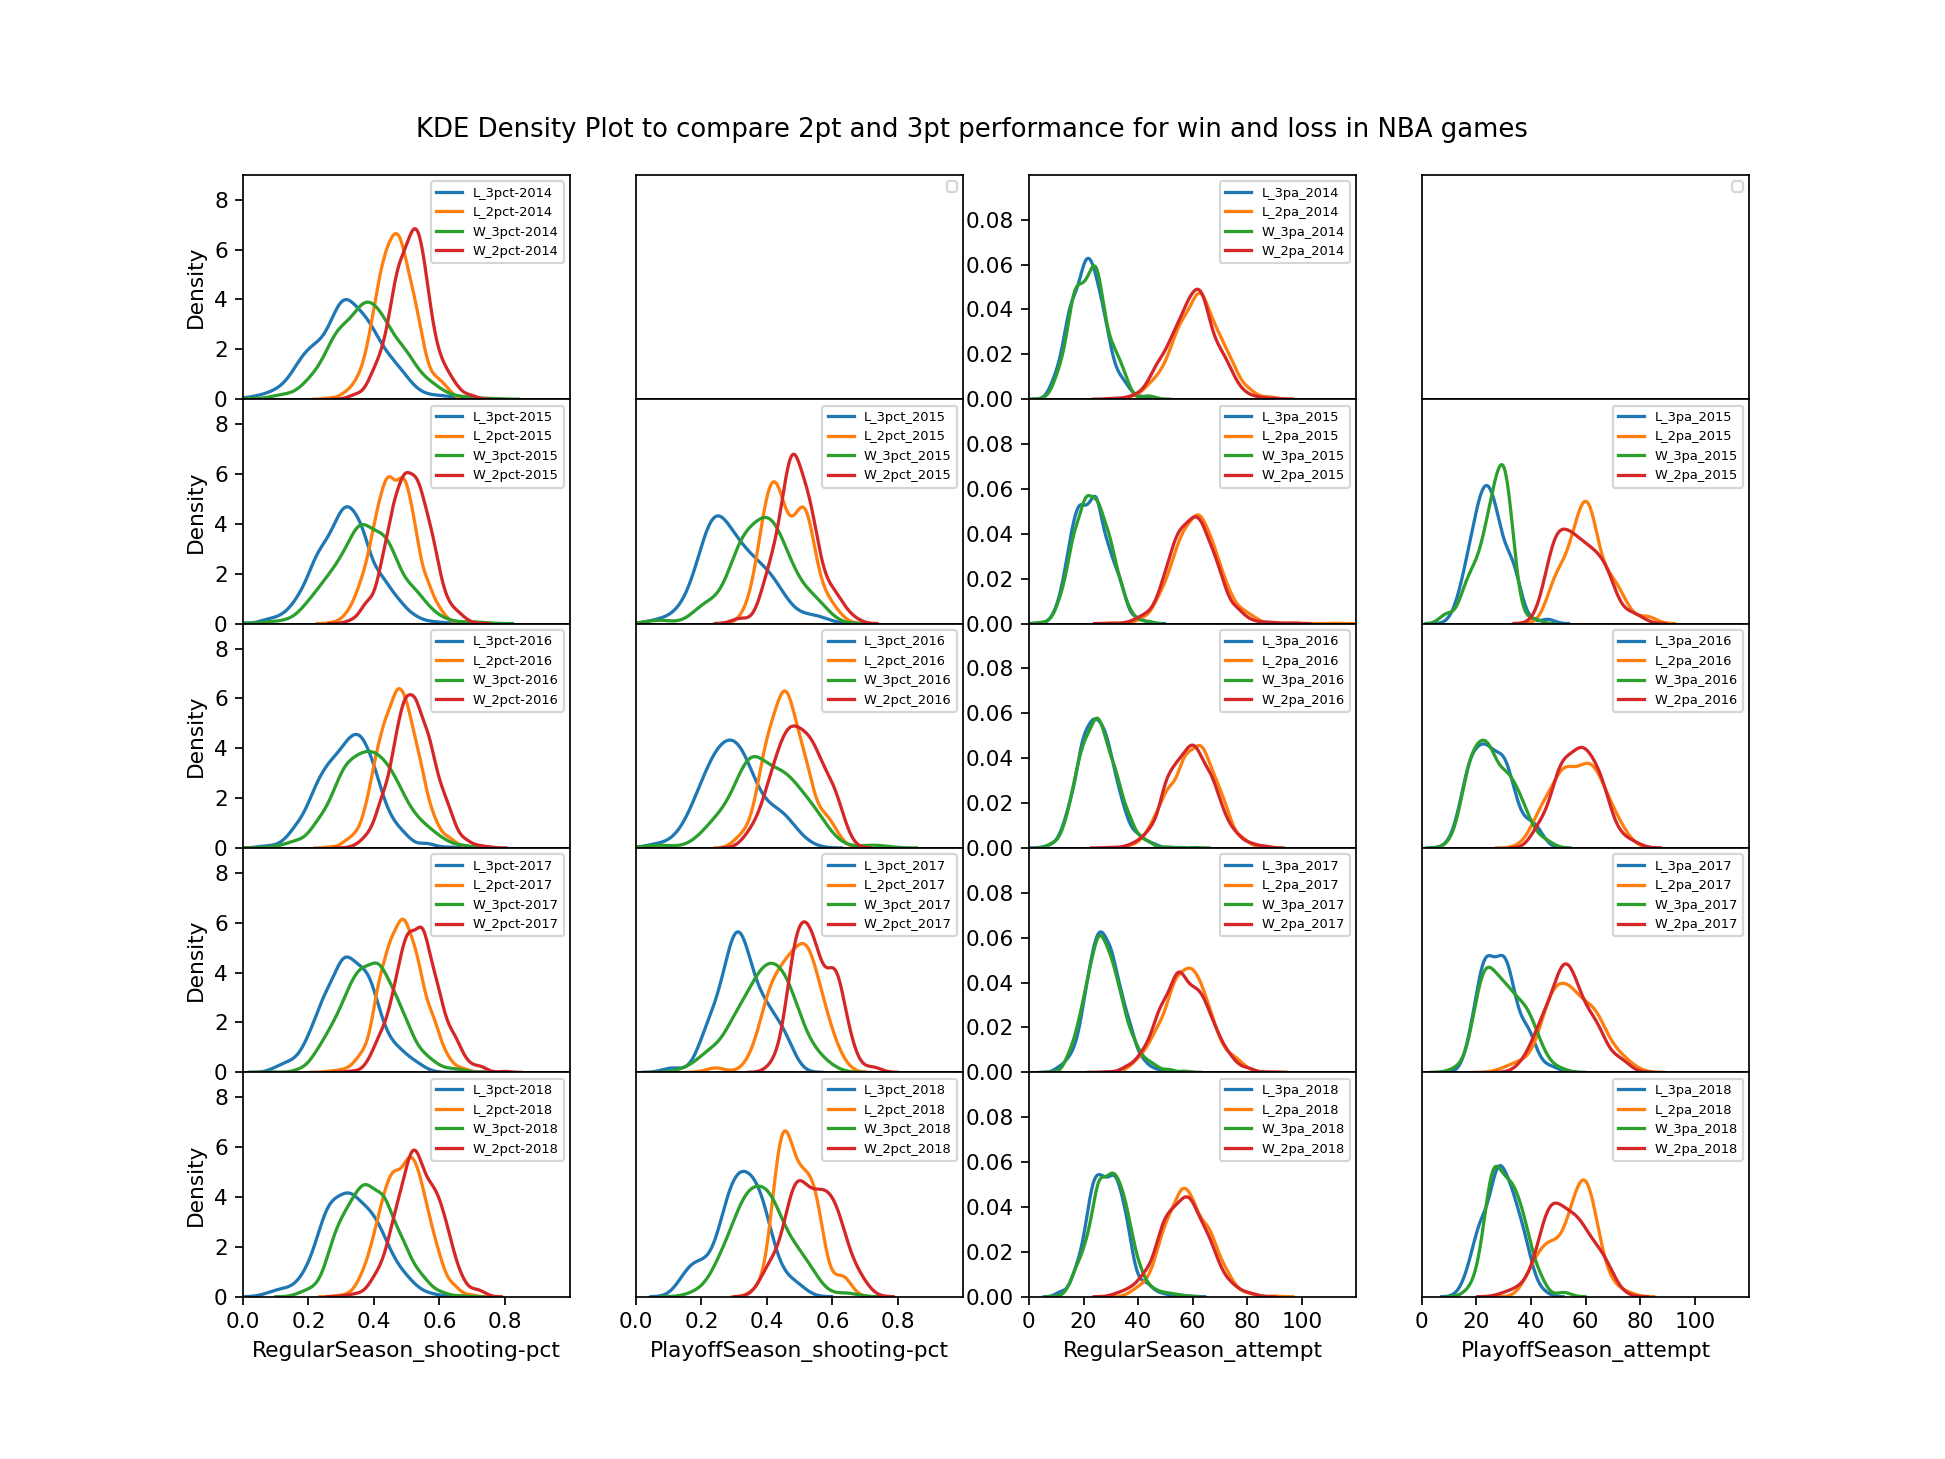

In [98]:
# work on: 2014-2018 regular season stats: nba.games.stats.csv
# read csv file to dataframe and create new columns
readls=[1,2,3,4,5,6,7,9,10,12,13,14]
coln=['team','gamenum','date','home','opponent','wl','totalp','fieldgoals','fieldgoalA','3pmade','3patt','3ppct']
df1418=pd.read_csv('nba.games.stats.csv',usecols=readls)
df1418.columns=coln
df1418['3ptotalpct']=df1418['3pmade']*3/df1418['totalp']
df1418['2pmade']=df1418['fieldgoals']-df1418['3pmade']
df1418['2patt']=df1418['fieldgoalA']-df1418['3patt']
df1418['2ppct']=df1418['2pmade']/df1418['2patt']
#create two figures for ploting shooting percentage and shooting attempt and made
fig1, ax1 = plt.subplots(5,4,figsize=(8, 6))
df1418['date']=pd.to_datetime(df1418['date'])
#create a dictionary to plot data for different year to different figures in plot
yr={'2014':0,'2015':1,'2016':2,'2017':3,'2018':4}
for (y,wl),gm in df1418.groupby([df1418['date'].dt.year,'wl']):
    sns.kdeplot(gm['3ppct'],ax=ax1[yr[str(y)]][0],label=wl+'_3pct-'+str(y))
    sns.kdeplot(gm['2ppct'],ax=ax1[yr[str(y)]][0],label=wl+'_2pct-'+str(y))
    ax1[yr[str(y)]][0].set_xlim(0,1)
    ax1[yr[str(y)]][0].set_ylim(0,9)
    ax1[yr[str(y)]][0].set_xticks(list(np.arange(0,1,0.2)))
    ax1[yr[str(y)]][0].set_yticks(list(np.arange(0,9,2)))
    ax1[yr[str(y)]][0].legend(loc='best')
    sns.kdeplot(gm['3patt'],ax=ax1[yr[str(y)]][2],label=wl+'_3pa_'+str(y))
    sns.kdeplot(gm['2patt'],ax=ax1[yr[str(y)]][2],label=wl+'_2pa_'+str(y))
    ax1[yr[str(y)]][2].set_xlim(0,120)
    ax1[yr[str(y)]][2].set_ylim(0,0.1)
    ax1[yr[str(y)]][2].set_xticks(list(np.arange(0,120,20)))
    ax1[yr[str(y)]][2].set_yticks(list(np.arange(0,0.1,0.02)))
    ax1[yr[str(y)]][2].legend(loc='best')
fig1.subplots_adjust(wspace=0.2,hspace=0)

In [99]:
#create a function to read playoff stats from each file
def playoffext(yrstart=2016):
    #read csv file with names formed from inputs and create new columns
    readls=[0,1,2,3,5,6,7,8,9,10,11]
    coln=['team','matchup','date','wl','totalp','fgm','fga','fgpct','3pmade','3patt','3ppct']
    rcsv=str(yrstart)+'-'+str(yrstart+1-2000)+'_Playoffs_box_scores.csv'
    raw=pd.read_csv(rcsv,usecols=readls)
    raw.columns=coln
    raw['fgpct']=raw['fgpct']/100
    raw['3ppct']=raw['3ppct']/100
    raw['2pmade']=raw['fgm']-raw['3pmade']
    raw['2patt']=raw['fga']-raw['3patt']
    raw['2ppct']=raw['2pmade']/raw['2patt']
    #create a dictionary to plot data for different year to different figures in plot
    yr={'2014':0,'2015':1,'2016':2,'2017':3,'2018':4}
    #create plots
    for wl,g in raw.groupby(['wl']):
        sns.kdeplot(g['3ppct'],ax=ax1[yr[str(yrstart+1)]][1],label=wl+'_3pct_'+str(yrstart+1))
        sns.kdeplot(g['2ppct'],ax=ax1[yr[str(yrstart+1)]][1],label=wl+'_2pct_'+str(yrstart+1))
        ax1[yr[str(yrstart+1)]][1].legend(loc='best')
        ax1[yr[str(yrstart+1)]][1].set_xlim(0,1)
        ax1[yr[str(yrstart+1)]][1].set_ylim(0,9)
        ax1[yr[str(yrstart+1)]][1].set_xticks(list(np.arange(0,1,0.2)))
        ax1[yr[str(yrstart+1)]][1].set_yticks(list(np.arange(0,8,2)))
        ax1[yr[str(yrstart+1)]][1].legend(loc='best')
        sns.kdeplot(g['3patt'],ax=ax1[yr[str(yrstart+1)]][3],label=wl+'_3pa_'+str(yrstart+1))
        sns.kdeplot(g['2patt'],ax=ax1[yr[str(yrstart+1)]][3],label=wl+'_2pa_'+str(yrstart+1))        
        ax1[yr[str(yrstart+1)]][3].legend(loc='best')
        ax1[yr[str(yrstart+1)]][3].set_xlim(0,120)
        ax1[yr[str(yrstart+1)]][3].set_ylim(0,0.1)
        ax1[yr[str(yrstart+1)]][3].set_xticks(list(np.arange(0,120,20)))
        ax1[yr[str(yrstart+1)]][3].set_yticks(list(np.arange(0,0.1,0.02)))
        ax1[yr[str(yrstart+1)]][3].legend(loc='best')        

In [100]:
playoffext(2017)
playoffext(2016)
playoffext(2015)
playoffext(2014)

In [101]:
for n in np.arange(0,5,1):
    ax1[n][0].legend(fontsize=6)
    ax1[n][1].legend(fontsize=6)
    ax1[n][2].legend(fontsize=6)
    ax1[n][3].legend(fontsize=6)
    ax1[n][1].set_yticks([])
    ax1[n][3].set_yticks([])
    ax1[n][1].set_ylabel('')
    ax1[n][2].set_ylabel('')
    ax1[n][3].set_ylabel('')
    if n<4:
        ax1[n][0].set_xticks([])
        ax1[n][1].set_xticks([])
        ax1[n][2].set_xticks([])
        ax1[n][3].set_xticks([])
ax1[4][0].set_xlabel('RegularSeason_shooting-pct')
ax1[4][1].set_xlabel('PlayoffSeason_shooting-pct')
ax1[4][2].set_xlabel('RegularSeason_attempt')
ax1[4][3].set_xlabel('PlayoffSeason_attempt')
fig1.subplots_adjust(wspace=0.2,hspace=0)
fig1.suptitle('KDE Density Plot to compare 2pt and 3pt performance for win and loss in NBA games',fontsize=12,y=0.92)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [103]:
fig1.savefig('KDE Plot_2pt-3pt performance in NBA games.jpg')